In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [3]:
wine = load_wine()

In [4]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [6]:
# загружаем данные в датафрейм
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data_class = wine.target

In [7]:
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [8]:
data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [9]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

In [10]:
len(y_test)

45

In [11]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [12]:
lda = LinearDiscriminantAnalysis()

In [13]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [14]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([2, 0, 1, 1, 1, 0, 0, 1, 2, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 2, 2, 0,
       1, 0, 2, 1, 2, 1, 2, 0, 1, 0, 1, 0, 2, 2, 2, 0, 0, 1, 2, 1, 1, 2,
       1])

In [15]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [16]:
result

,0,1
0,2,2
1,0,0
2,1,1
3,1,1
4,1,1
5,0,0
6,0,0
7,1,1
8,2,2
9,1,1


In [17]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
# (наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(y_test, lda.predict(X_test))

0.9777777777777777

In [19]:
# коэффициенты дискриминатных линий
lda.coef_

array([[ 2.57612972e+00,  5.31106986e-02,  5.74622098e+00,
        -6.62325948e-01,  4.37296614e-03, -2.83476232e+00,
         4.40568990e+00, -8.03875809e-02, -6.54737996e-01,
        -7.42085713e-01,  7.90803165e-01,  4.87759776e+00,
         1.48144053e-02],
       [-2.00851531e+00, -6.13325401e-01, -5.62403094e+00,
         3.74523793e-01,  2.28964794e-03, -1.93247665e-01,
         1.22150099e+00,  3.63071136e+00,  1.00445415e+00,
        -6.89615523e-01,  3.32085652e+00, -3.58661236e-01,
        -5.91955765e-03],
       [-4.43235918e-01,  9.09395256e-01,  8.48522853e-01,
         3.41804805e-01, -9.90547725e-03,  4.34775622e+00,
        -8.23657508e+00, -5.71665108e+00, -6.80708604e-01,
         2.16447428e+00, -6.45979226e+00, -6.37084997e+00,
        -1.15921361e-02]])

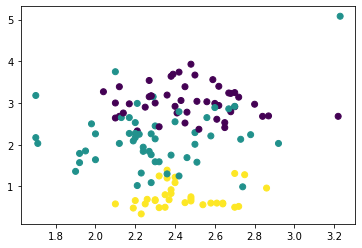

In [20]:
# визуализируем дискриминантную линию только по 2 признакам
plt.scatter(X_train['ash'], X_train['flavanoids'], c=y_train)
plt.show()

In [21]:
small_train = X_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[['ash', 'flavanoids']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['ash', 'flavanoids']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

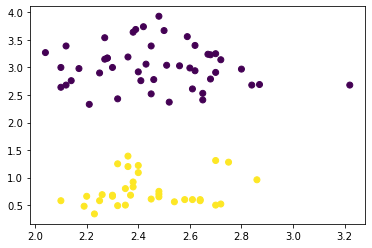

In [22]:
plt.scatter(small_train['ash'], small_train['flavanoids'], c=sy_train)
plt.show()

In [23]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [24]:
# посмотрим на наши центроиды
lda_small.means_

array([[2.46617021, 3.02468085],
       [2.43787879, 0.76545455]])

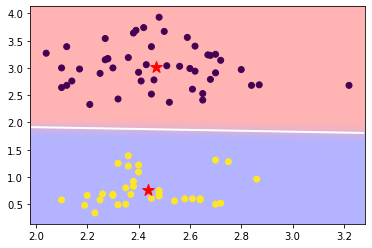

In [25]:
# сам scatter plot
plt.scatter(small_train['ash'], small_train['flavanoids'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [26]:
# второй признак в 16 раз важнее первого для кластеризации (это видно по визуализации)
lda_small.coef_

array([[ -1.50395643, -18.2459669 ]])

In [27]:
# какая будет точность?
accuracy_score(sy_test, lda_small.predict(small_test))

1.0

In [28]:
data[['flavanoids', 'ash']].corr()

,flavanoids,ash
flavanoids,1.000000,0.115077
ash,0.115077,1.000000


In [29]:
# заменим модель на логистическую регресиию
# кому интересно, отличия логистической регресссии от LDA: 
# https://www.introspective-mode.org/logistic-regression-or-discriminant-function-analysis/
# Основные моменты:
# LR может работать с категориальными признаками 
# зависимая переменная в LR подчиняется логистической функции (изменяется от 0 до 1) и непрерывна
from sklearn.linear_model import LogisticRegression

In [30]:
lr = LogisticRegression()

In [31]:
lr.fit(small_train, sy_train)

LogisticRegression()

In [32]:
lr.predict(small_test)

array([2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2,
       2, 0, 0, 2, 2])

In [33]:
accuracy_score(sy_test, lr.predict(small_test))

1.0

In [34]:
lr.coef_

array([[-0.025255  , -3.06851428]])

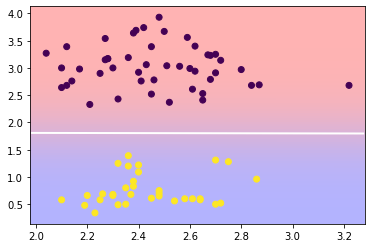

In [35]:
plt.scatter(small_train['ash'], small_train['flavanoids'], c=sy_train)

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

plt.show()

## Кластеризация

In [36]:
# генерируем искусвтенные данные для примера
from sklearn.datasets import make_moons, make_blobs

In [37]:
# 200 точек с 2 центрами, СКО - 2.5
X, y = make_blobs(n_samples=200, centers=2, cluster_std=2.5)

In [38]:
X

array([[ -8.63484255,  11.78806027],
       [ -5.70359346,   2.09018056],
       [  5.82008079,   4.55132723],
       [  8.69418474,   2.71337009],
       [ -3.49952062,   0.68474594],
       [  6.48238995,  10.95685212],
       [  6.20942039,  10.69498455],
       [  4.6574522 ,   9.26561981],
       [ -4.52611127,   3.40925386],
       [ -1.08293216,   3.95567642],
       [  5.60819759,   8.39211138],
       [  4.38562732,   6.06616656],
       [  9.70474329,   9.93041453],
       [  0.62247864,   1.81293997],
       [  9.97273381,   9.11656388],
       [  5.21766371,   8.42064657],
       [ -5.4391911 ,   4.03412632],
       [  6.16517412,   6.97248822],
       [  7.37818702,  12.87176796],
       [  7.79372574,   6.10339286],
       [ -7.90552905,   8.38160255],
       [  9.12738749,   5.52404797],
       [ -6.52676905,   5.33488086],
       [  5.50966644,   8.70854831],
       [  8.40021305,   8.12144009],
       [ -2.36080623,   1.69398707],
       [  7.08165179,   8.30873481],
 

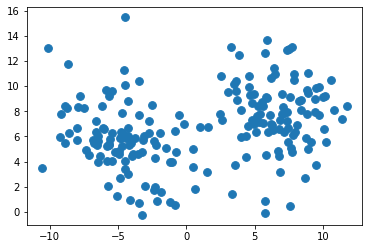

In [39]:
plt.scatter(X[:, 0], X[:, 1], cmap='autumn', s=60)

In [40]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

В реальных задачах при разделении выборки на train и test нужно обучать StandardScaler только на тренировочных данных (и применять уже к тестовым данным).


In [43]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.57752821e+00,  1.73211534e+00],
       [-1.09666265e+00, -1.58659619e+00],
       [ 7.93773093e-01, -7.44367158e-01],
       [ 1.26526410e+00, -1.37333450e+00],
       [-7.35088905e-01, -2.06754999e+00],
       [ 9.02423587e-01,  1.44766759e+00],
       [ 8.57643476e-01,  1.35805388e+00],
       [ 6.03046194e-01,  8.68910961e-01],
       [-9.03499051e-01, -1.13519610e+00],
       [-3.38652394e-01, -9.48204829e-01],
       [ 7.59014076e-01,  5.69987630e-01],
       [ 5.58453865e-01, -2.25973976e-01],
       [ 1.43104422e+00,  1.09641037e+00],
       [-5.88831595e-02, -1.68147070e+00],
       [ 1.47500753e+00,  8.17902529e-01],
       [ 6.94947773e-01,  5.79752656e-01],
       [-1.05328797e+00, -9.21358490e-01],
       [ 8.50384963e-01,  8.41783724e-02],
       [ 1.04937731e+00,  2.10297096e+00],
       [ 1.11754560e+00, -2.13234762e-01],
       [-1.45788579e+00,  5.66391404e-01],
       [ 1.33633015e+00, -4.11492383e-01],
       [-1.23170296e+00, -4.76227261e-01],
       [ 7.

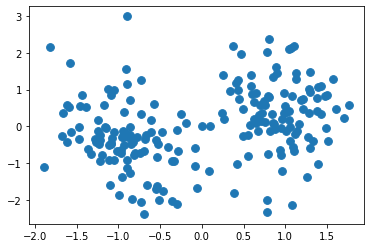

In [44]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

In [45]:
from sklearn.cluster import KMeans

In [57]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=2)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0])

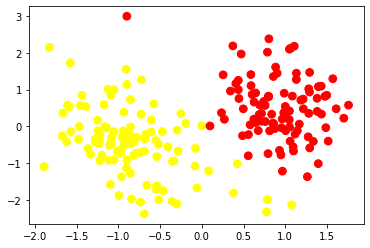

In [58]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

In [59]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

C:\Users\PC\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


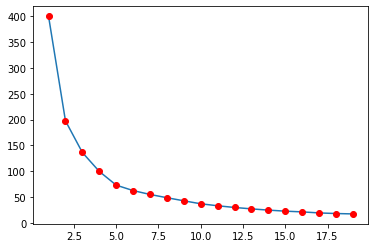

In [60]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

Иерархическая кластеризация

In [61]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

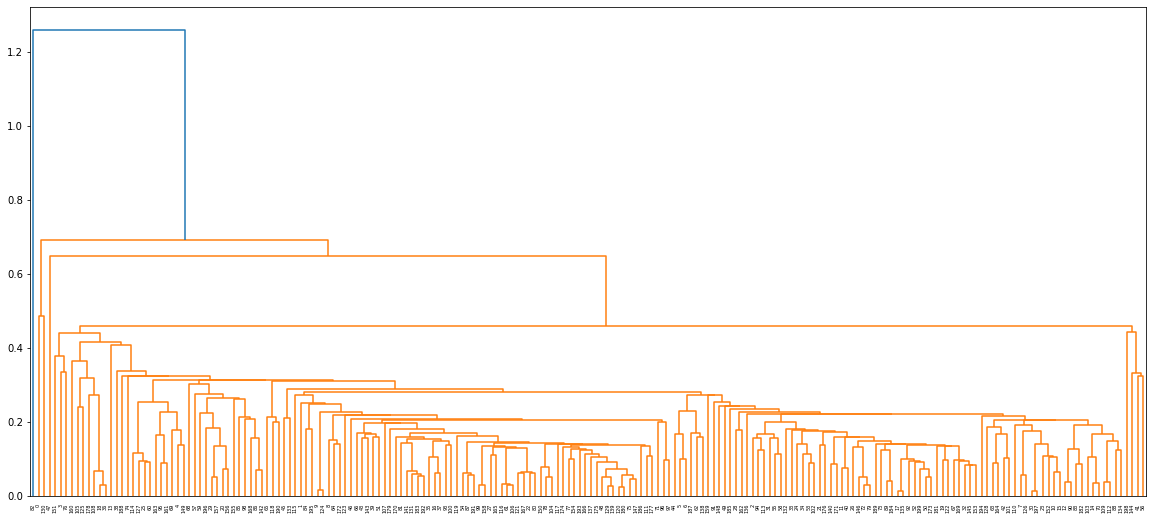

In [63]:
# строим дендрограмму
distance_mat = pdist(X_scaled) # pdist посчитает нам матрицу попарных расстояний между точками
# Z = hierarchy.linkage(distance_mat) # linkage — реализация агломеративного алгоритма
Z = hierarchy.linkage(distance_mat, 'ward')
plt.figure(figsize=(20, 9))
dn = hierarchy.dendrogram(Z)

In [64]:
# делаем уже кластеризацию по факту
from sklearn.cluster import AgglomerativeClustering

In [69]:
aglo = AgglomerativeClustering(n_clusters=4)
clusters = aglo.fit_predict(X_scaled)
clusters

array([0, 2, 3, 3, 2, 1, 1, 1, 2, 2, 1, 3, 1, 2, 1, 1, 2, 3, 1, 3, 0, 3,
       0, 1, 1, 2, 1, 0, 1, 0, 1, 3, 3, 3, 1, 2, 1, 2, 0, 0, 3, 2, 1, 0,
       1, 2, 2, 2, 0, 2, 3, 0, 3, 1, 0, 3, 2, 0, 3, 0, 2, 0, 1, 1, 2, 0,
       0, 3, 0, 2, 1, 3, 1, 3, 2, 0, 3, 0, 0, 1, 0, 2, 0, 1, 3, 0, 0, 0,
       1, 3, 1, 2, 3, 0, 3, 2, 3, 3, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 3, 2, 3, 0, 0, 0, 2, 0, 0, 3, 2, 2, 1, 1, 2, 1, 0, 0, 0,
       3, 2, 1, 3, 1, 0, 1, 0, 3, 0, 0, 0, 2, 3, 1, 0, 1, 2, 0, 3, 1, 3,
       0, 0, 0, 0, 0, 1, 1, 2, 1, 2, 1, 0, 0, 0, 0, 3, 0, 3, 2, 3, 0, 0,
       3, 0, 1, 0, 0, 3, 1, 0, 3, 1, 2, 1, 1, 3, 0, 0, 0, 0, 1, 3, 0, 1,
       2, 3], dtype=int64)

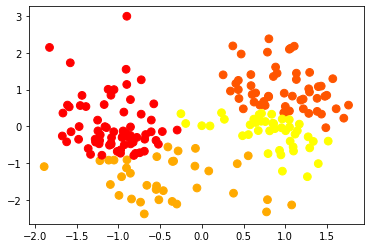

In [70]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', c=clusters, s=60)

In [71]:
df = pd.DataFrame(X)
df['y_hat'] = clusters
df

,0,1,y_hat
0,-8.634843,11.788060,0
1,-5.703593,2.090181,2
2,5.820081,4.551327,3
3,8.694185,2.713370,3
4,-3.499521,0.684746,2
...,...,...,...
195,2.417820,7.809691,3
196,-9.172818,7.783703,0
197,5.867700,9.082141,1
198,3.295578,1.397230,2
